In [1]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [2]:
df=pd.read_csv("Maintenance.csv")
df

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,0


In [3]:
df.head(20)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
5,6,M14865,M,298.1,308.6,1425,41.9,11,0,0,0,0,0,0
6,7,L47186,L,298.1,308.6,1558,42.4,14,0,0,0,0,0,0
7,8,L47187,L,298.1,308.6,1527,40.2,16,0,0,0,0,0,0
8,9,M14868,M,298.3,308.7,1667,28.6,18,0,0,0,0,0,0
9,10,M14869,M,298.5,309.0,1741,28.0,21,0,0,0,0,0,0


## 1. EDA

In [4]:
data=df.rename(columns={"Product ID":"product_ID","Air temperature [K]":"air_temp","Process temperature [K]":"process_temp","Rotational speed [rpm]":"rotational_speed","Torque [Nm]":"torque","Tool wear [min]":"tool_wear","Machine failure":"machine_failure"},inplace=False)
data

,UDI,product_ID,Type,air_temp,process_temp,rotational_speed,torque,tool_wear,machine_failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,0


In [5]:
data.shape

(10000, 14)

In [6]:
data.dtypes

UDI                   int64
product_ID           object
Type                 object
air_temp            float64
process_temp        float64
rotational_speed      int64
torque              float64
tool_wear             int64
machine_failure       int64
TWF                   int64
HDF                   int64
PWF                   int64
OSF                   int64
RNF                   int64
dtype: object

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   UDI               10000 non-null  int64  
 1   product_ID        10000 non-null  object 
 2   Type              10000 non-null  object 
 3   air_temp          10000 non-null  float64
 4   process_temp      10000 non-null  float64
 5   rotational_speed  10000 non-null  int64  
 6   torque            10000 non-null  float64
 7   tool_wear         10000 non-null  int64  
 8   machine_failure   10000 non-null  int64  
 9   TWF               10000 non-null  int64  
 10  HDF               10000 non-null  int64  
 11  PWF               10000 non-null  int64  
 12  OSF               10000 non-null  int64  
 13  RNF               10000 non-null  int64  
dtypes: float64(3), int64(9), object(2)
memory usage: 1.1+ MB


In [8]:
data.nunique()

UDI                 10000
product_ID          10000
Type                    3
air_temp               93
process_temp           82
rotational_speed      941
torque                577
tool_wear             246
machine_failure         2
TWF                     2
HDF                     2
PWF                     2
OSF                     2
RNF                     2
dtype: int64

In [9]:
data.describe(include='all')

,UDI,product_ID,Type,air_temp,process_temp,rotational_speed,torque,tool_wear,machine_failure,TWF,HDF,PWF,OSF,RNF
count,10000.00000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
unique,NaN,10000,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,M14860,L,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5000.50000,NaN,NaN,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2886.89568,NaN,NaN,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,1.00000,NaN,NaN,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2500.75000,NaN,NaN,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,5000.50000,NaN,NaN,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7500.25000,NaN,NaN,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000


In [10]:
data=data.drop(["product_ID"],axis=1)
data

,UDI,Type,air_temp,process_temp,rotational_speed,torque,tool_wear,machine_failure,TWF,HDF,PWF,OSF,RNF
0,1,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9996,9997,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9997,9998,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9998,9999,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,0


In [11]:
correlation=data.corr()
correlation

,UDI,air_temp,process_temp,rotational_speed,torque,tool_wear,machine_failure,TWF,HDF,PWF,OSF,RNF
UDI,1.000000,0.117428,0.324428,-0.006615,0.003207,-0.010702,-0.022892,0.009154,-0.022215,-0.023557,-0.000990,-0.005954
air_temp,0.117428,1.000000,0.876107,0.022670,-0.013778,0.013853,0.082556,0.009955,0.137831,0.003470,0.001988,0.017688
process_temp,0.324428,0.876107,1.000000,0.019277,-0.014061,0.013488,0.035946,0.007315,0.056933,-0.003355,0.004554,0.022279
rotational_speed,-0.006615,0.022670,0.019277,1.000000,-0.875027,0.000223,-0.044188,0.010389,-0.121241,0.123018,-0.104575,-0.013088
torque,0.003207,-0.013778,-0.014061,-0.875027,1.000000,-0.003093,0.191321,-0.014662,0.142610,0.083781,0.183465,0.016136
tool_wear,-0.010702,0.013853,0.013488,0.000223,-0.003093,1.000000,0.105448,0.115792,-0.001287,-0.009334,0.155894,0.011326
machine_failure,-0.022892,0.082556,0.035946,-0.044188,0.191321,0.105448,1.000000,0.362904,0.575800,0.522812,0.531083,0.004516
TWF,0.009154,0.009955,0.007315,0.010389,-0.014662,0.115792,0.362904,1.000000,-0.007332,0.008577,0.038243,0.030970
HDF,-0.022215,0.137831,0.056933,-0.121241,0.142610,-0.001287,0.575800,-0.007332,1.000000,0.018443,0.046396,-0.004706
PWF,-0.023557,0.003470,-0.003355,0.123018,0.083781,-0.009334,0.522812,0.008577,0.018443,1.000000,0.115836,-0.004273


<AxesSubplot:>

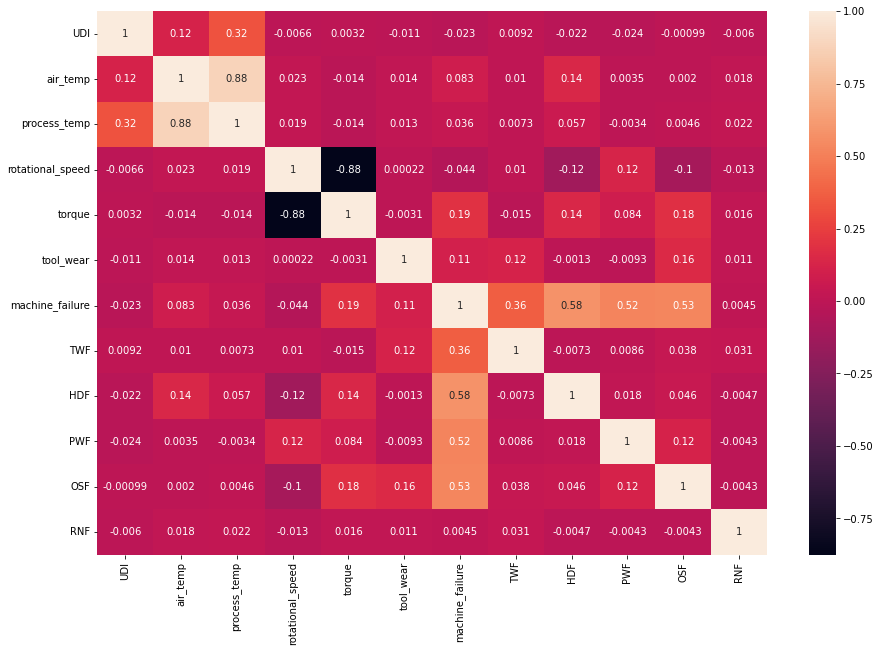

In [12]:
plt.figure(figsize=(15,10))
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns,annot=True)

C:\Users\anupg\anaconda3\AB\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='air_temp', ylabel='Density'>

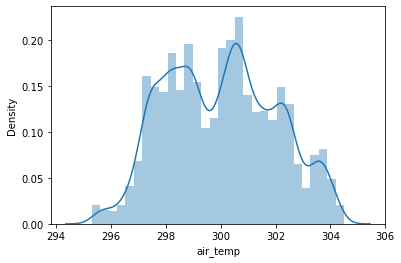

In [13]:
sns.distplot(data["air_temp"],bins=30)

C:\Users\anupg\anaconda3\AB\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='torque', ylabel='Density'>

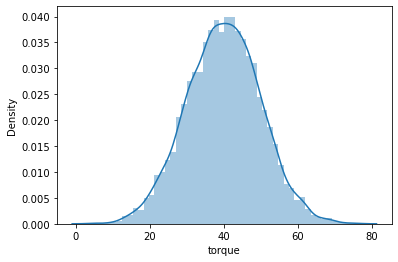

In [14]:
sns.distplot(data["torque"])

C:\Users\anupg\anaconda3\AB\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='rotational_speed', ylabel='Density'>

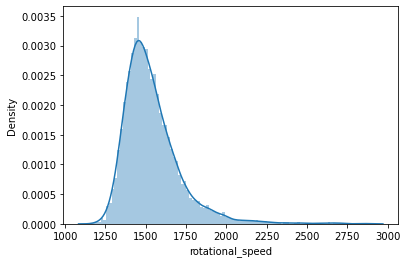

In [15]:
sns.distplot(data["rotational_speed"],bins=100)

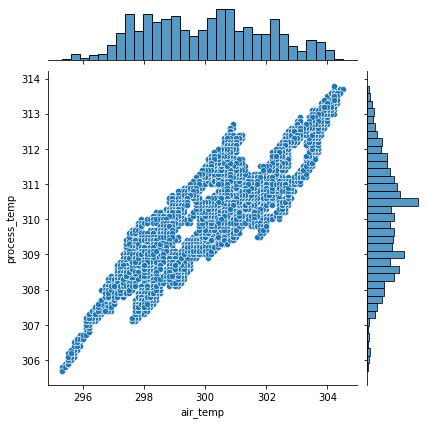

In [16]:
sns.jointplot(x="air_temp",y="process_temp",data=data)

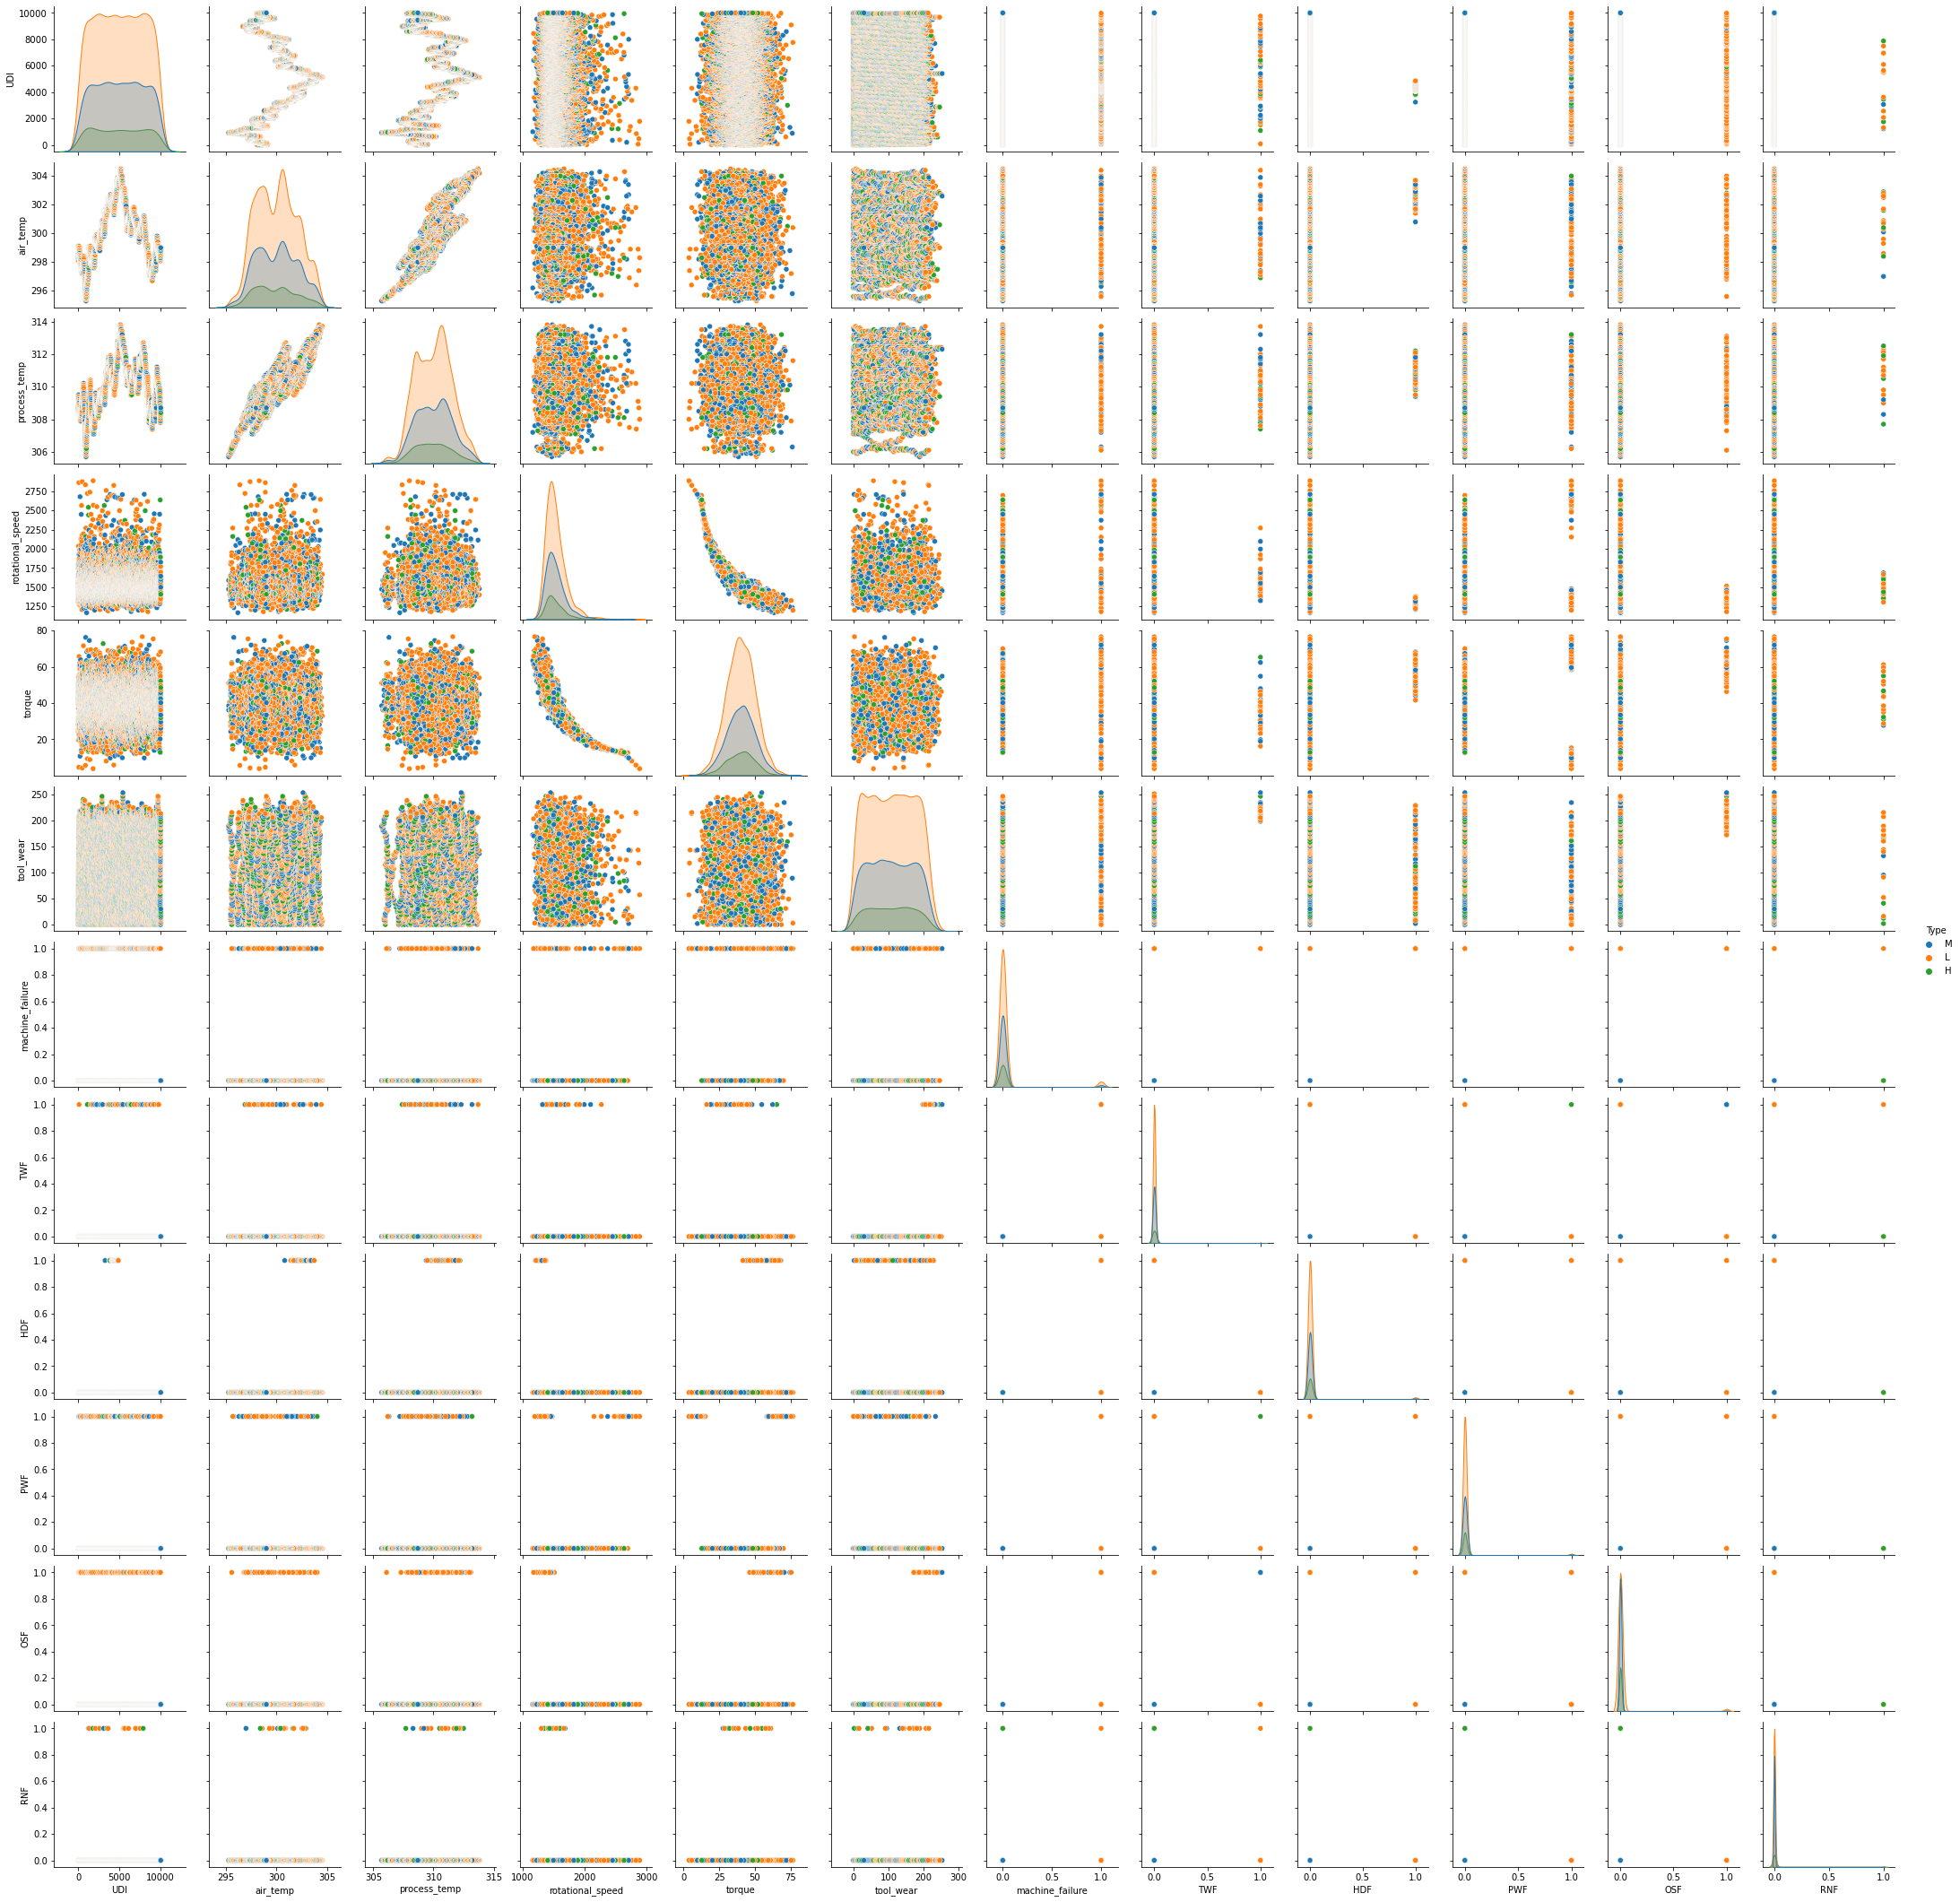

In [17]:
sns.pairplot(data=data,hue="Type")

In [18]:
data.machine_failure.value_counts()

0    9661
1     339
Name: machine_failure, dtype: int64

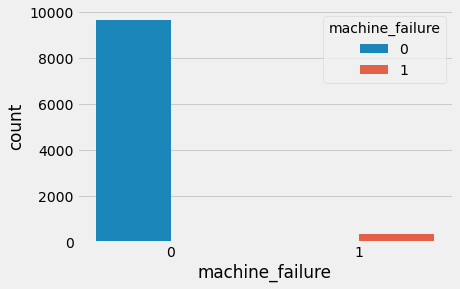

In [19]:
plt.style.use('fivethirtyeight')
ax = sns.countplot(x='machine_failure', data=data, hue='machine_failure')

In [20]:
data.HDF.value_counts()

0    9885
1     115
Name: HDF, dtype: int64

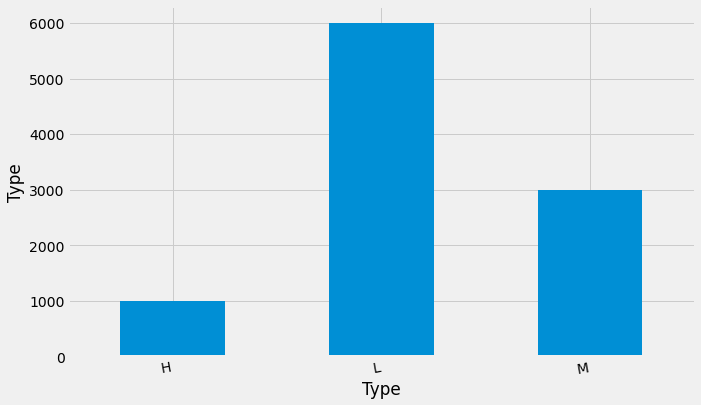

In [21]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,6))
ax= data.groupby('Type').HDF.count().plot.bar(ylim=0)
ax.set_ylabel('Type')
ax.set_xticklabels(ax.get_xticklabels(), rotation=10, ha="right")
plt.show()

In [22]:
df2= data

In [23]:
df2.head()

,UDI,Type,air_temp,process_temp,rotational_speed,torque,tool_wear,machine_failure,TWF,HDF,PWF,OSF,RNF
0,1,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [24]:
df2.TWF.value_counts()

0    9954
1      46
Name: TWF, dtype: int64

In [25]:
df2.HDF.value_counts()

0    9885
1     115
Name: HDF, dtype: int64

In [26]:
df2.PWF.value_counts()

0    9905
1      95
Name: PWF, dtype: int64

In [27]:
df2.OSF.value_counts()

0    9902
1      98
Name: OSF, dtype: int64

In [28]:
df2.RNF.value_counts()

0    9981
1      19
Name: RNF, dtype: int64

In [49]:
df2.rename({'Type':'Machine_type'}, axis='columns')

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9996,9997,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9997,9998,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9998,9999,299.0,308.7,1408,48.5,25,0,0,0,0,0,0


In [50]:
df2.drop(['UDI'], axis=1)

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9996,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9997,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9998,299.0,308.7,1408,48.5,25,0,0,0,0,0,0


In [57]:
X = data.iloc[:,2:7] 
y = data.iloc[:,7:12] 

In [60]:
X.head()

,air_temp,process_temp,rotational_speed,torque,tool_wear
0,298.1,308.6,1551,42.8,0
1,298.2,308.7,1408,46.3,3
2,298.1,308.5,1498,49.4,5
3,298.2,308.6,1433,39.5,7
4,298.2,308.7,1408,40.0,9


In [61]:
y.head()

,machine_failure,TWF,HDF,PWF,OSF
0,0,0,0,0,0
1,0,0,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,0


In [63]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [64]:
print(model.feature_importances_)

[0.15671412 0.13523391 0.20389871 0.30856237 0.19559089]


NameError: name 'plot' is not defined

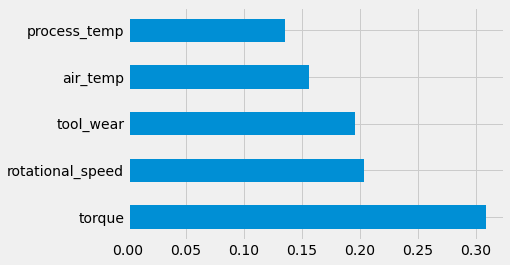

In [68]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plot.show()

In [69]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [72]:
X_train.shape

(8000, 5)

In [73]:
from sklearn.ensemble import RandomForestRegressor
rf_random=RandomForestRegressor()

In [74]:
### Hyperparameters
n_estimators=[int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [76]:
from sklearn.model_selection import RandomizedSearchCV

In [77]:
# Randomized Search CV

# Number of trees in random forest 
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.oppend(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [78]:
random_grid = {'n_estimators' : n_estimators,
              'max_features':max_features,
              'max_depth':max_depth,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [79]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()

In [80]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, scoring = 'neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [81]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  11.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  11.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  11.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  11.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  11.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  14.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  14.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [82]:
predictions=rf_random.predict(X_test)

In [83]:
predictions

array([[3.24026393e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [3.37964386e-05, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00]])

C:\Users\anupg\anaconda3\AB\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

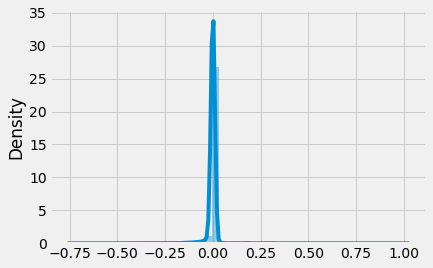

In [84]:
sns.distplot(y_test-predictions)

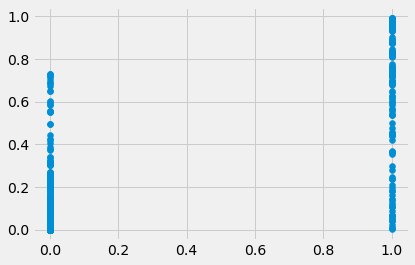

In [85]:
plt.scatter(y_test,predictions)